In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [69]:
df=pd.read_csv("indian_liver_patient.csv")

In [70]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [72]:
df.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [74]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [75]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [76]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df["Albumin_and_Globulin_Ratio"].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

In [77]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

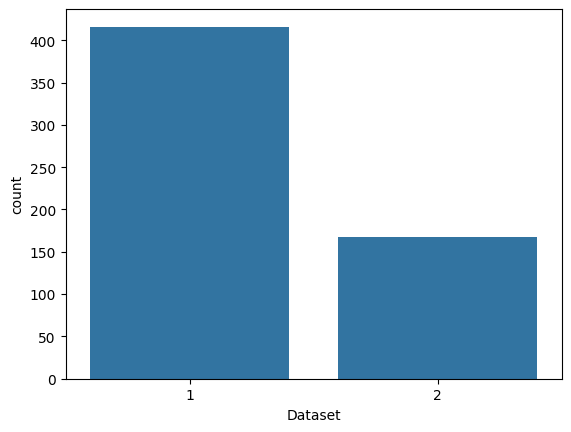

Dataset
1    416
2    167
Name: count, dtype: int64


In [78]:
#EDA
sns.countplot(x='Dataset', data=df)
plt.show()
print(df['Dataset'].value_counts())

In [79]:
df['Dataset'] = df['Dataset'].replace([2,1],[1,0])
df['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

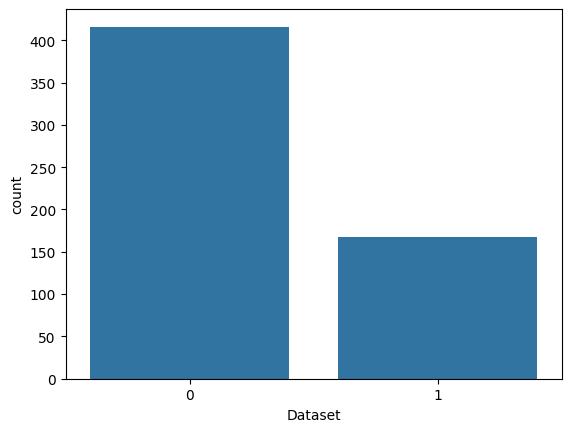

In [80]:
sns.countplot(x='Dataset', data=df)
plt.show()

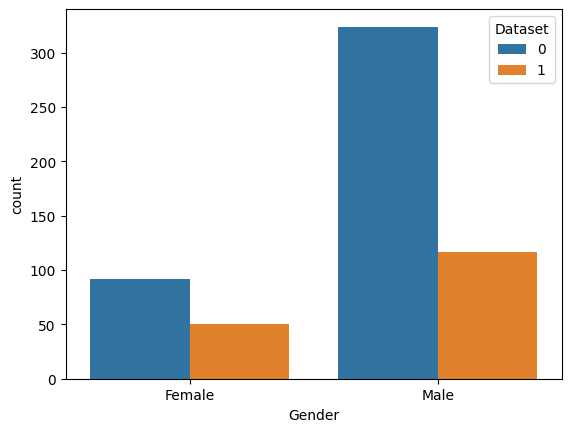

Dataset
0    416
1    167
Name: count, dtype: int64


In [81]:
sns.countplot(x='Gender', data=df, hue = 'Dataset')
plt.show()
print(df['Dataset'].value_counts())

In [82]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [83]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


<Axes: >

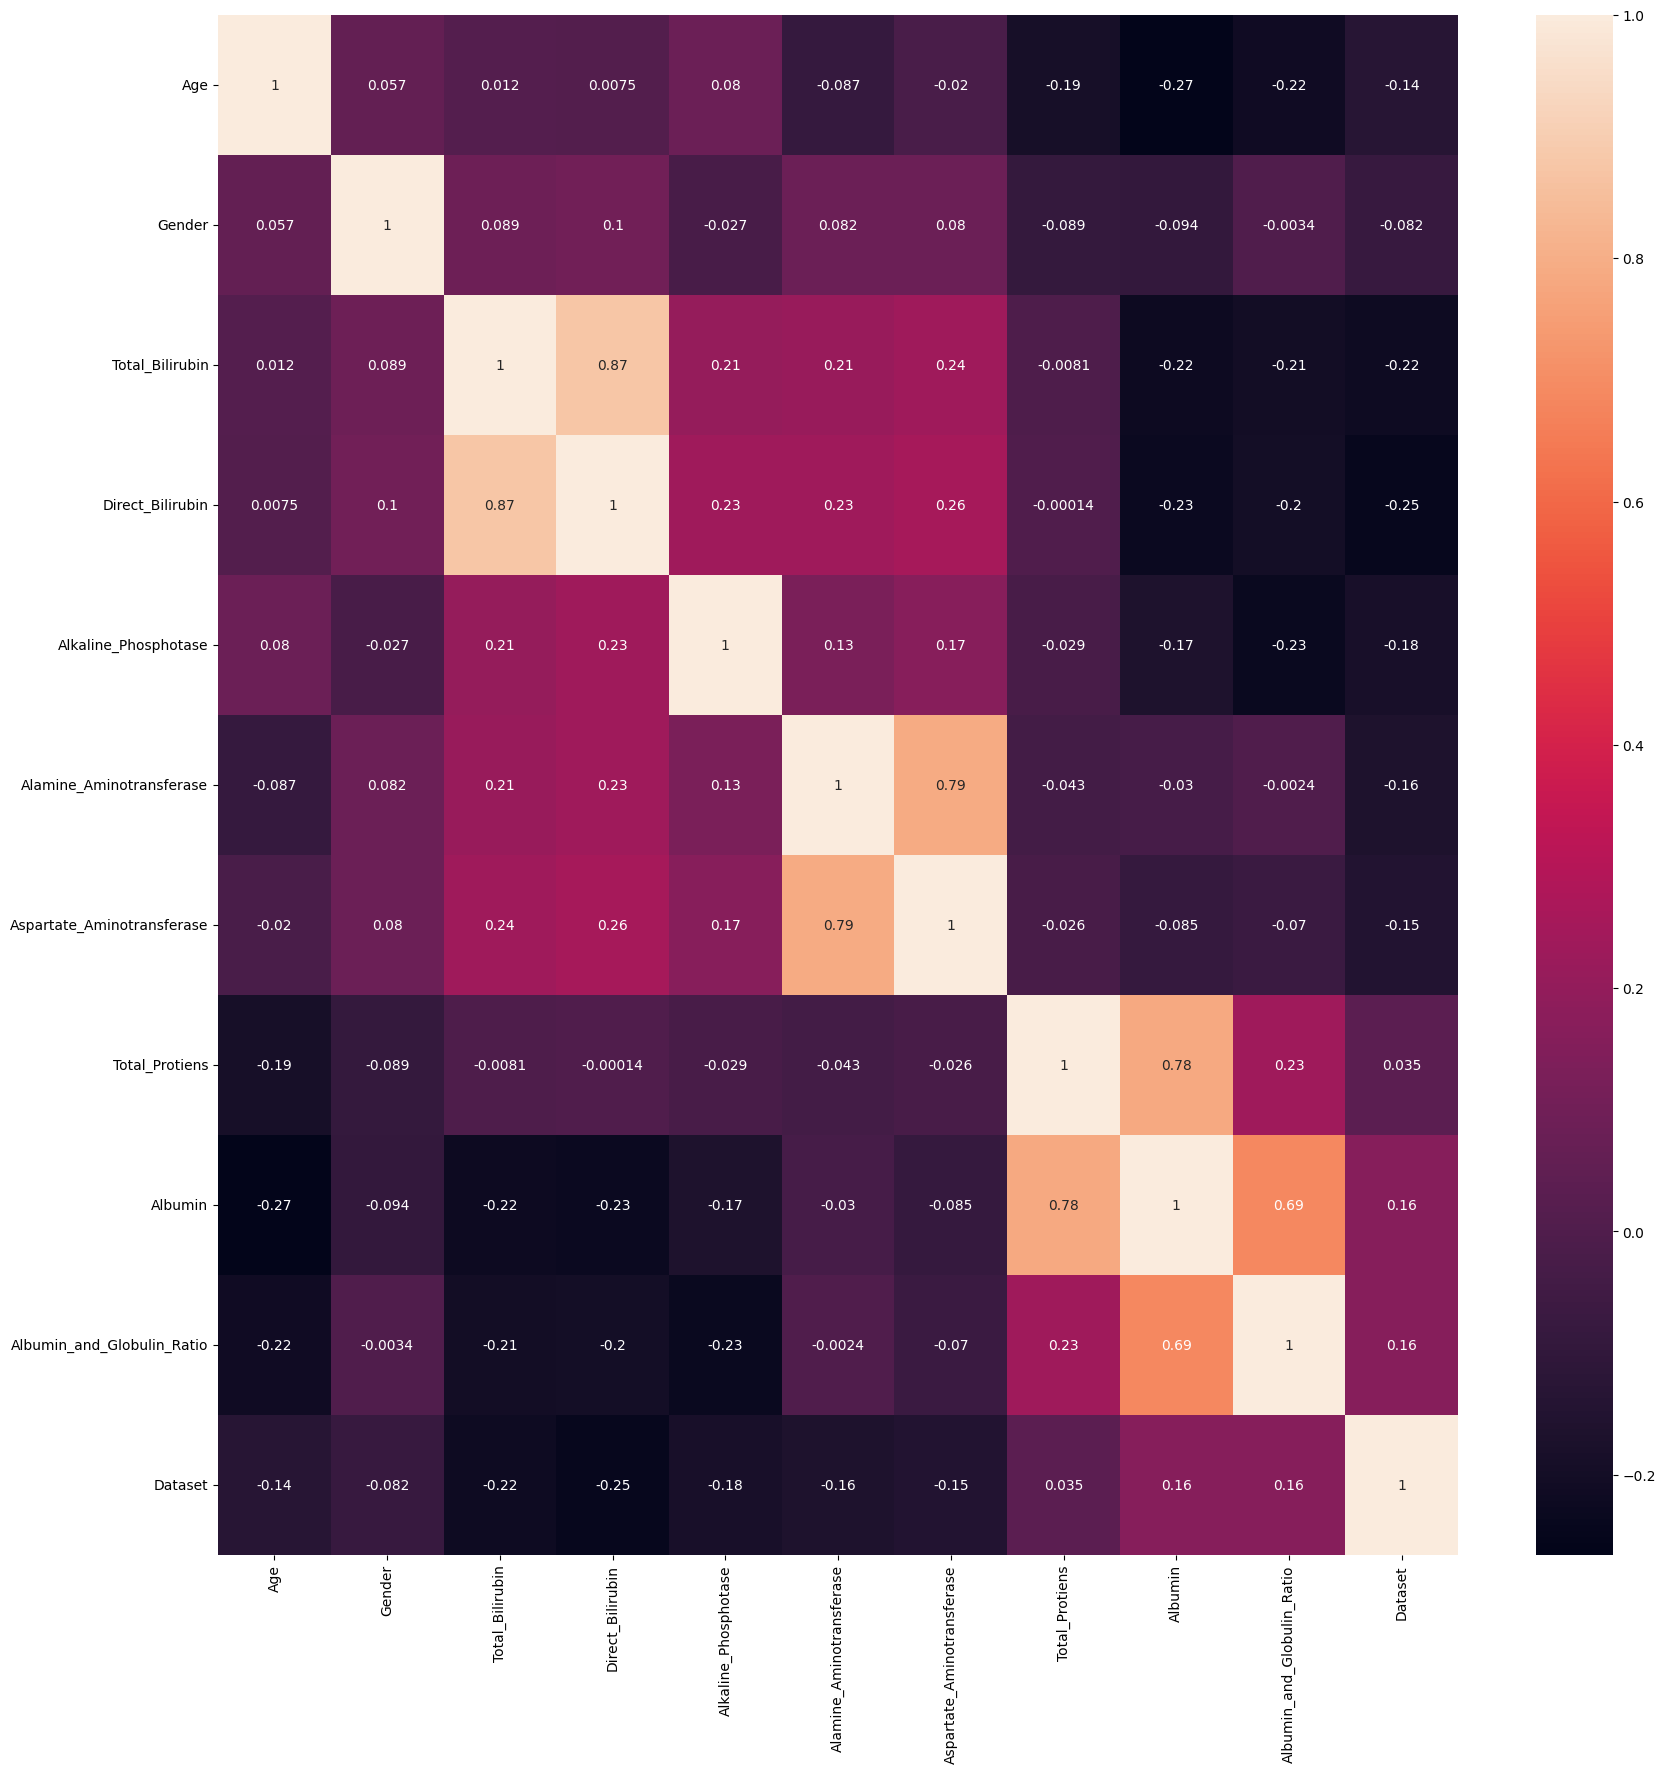

In [84]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [86]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [87]:
# X = df[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = df.drop('Dataset', axis = 1)
y = df['Dataset']

In [88]:
print(X)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [89]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64


In [90]:
#Scaling 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [92]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

In [95]:
# Evaluate the random forest model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Classification report
report = classification_report(y_test, y_pred)

In [96]:
# Display
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 0.8029
Precision: 0.7674
Recall: 0.9000
F1 Score: 0.8285
ROC AUC Score: 0.8974
Confusion Matrix:
[[68 30]
 [11 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        98
           1       0.77      0.90      0.83       110

    accuracy                           0.80       208
   macro avg       0.81      0.80      0.80       208
weighted avg       0.81      0.80      0.80       208



In [98]:
input=(65,0,0.7,0.1,187,16,18,6.8,3.3,0.90)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)

In [99]:
ld_prediction = model.predict(input_reshaped)
print(ld_prediction)
if (ld_prediction[0] == 0):
  print("The Person does not have liver disease")

else:
  print("The Person has liver disease")

[0]
The Person does not have liver disease


In [100]:
filename="liver_disease_prediction.pkl"
pickle.dump(model,open(filename,'wb'))

In [101]:
loaded_model = pickle.load(open('liver_disease_prediction.pkl', 'rb'))